In [117]:
%load_ext autoreload

%autoreload 2
import numpy as np
import corner, sys
import getdist
from getdist import plots, MCSamples
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../modules/')
import _plot_scaling_relation_from_chains as _plot_rel
#plt.switch_backend("Qt5Agg")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
names = ['1', '2', '3', '4', '5', '6']
labels = [r'\ln \lambda_0', r'\mu_z', r'\mu_m', r'\sigma_{\ln \lambda, 0}', r'\sigma_z', r'\sigma_m']
settings={'mult_bias_correction_order':0,'smooth_scale_2D':3, 'smooth_scale_1D':4, 'boundary_correction_order':0}

In [119]:
n_cut=15000
name='1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=4_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/WLxN/MCMC_fit_m-r_WLxN_{name}.pkl', allow_pickle = True)
WLxN_full_range = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='full range')

Removed no burn in


In [121]:
n_cut=15000
name='1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=4_photoz=Truez_low_z_sample_hmf=Despali16'
t = np.load(f'../chains/WLxN/MCMC_fit_m-r_WLxN_{name}.pkl', allow_pickle = True)
WLxN_full_redshift_range = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'$ z < 0.7$')

Removed no burn in


In [99]:
n_cut=15000
name='1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=4_photoz=Truez_low_richness_sample_hmf=Despali16'
t = np.load(f'../chains/WLxN/MCMC_fit_m-r_WLxN_{name}.pkl', allow_pickle = True)
WLxN_full_richness_range = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'$\lambda < 100$')

Removed no burn in


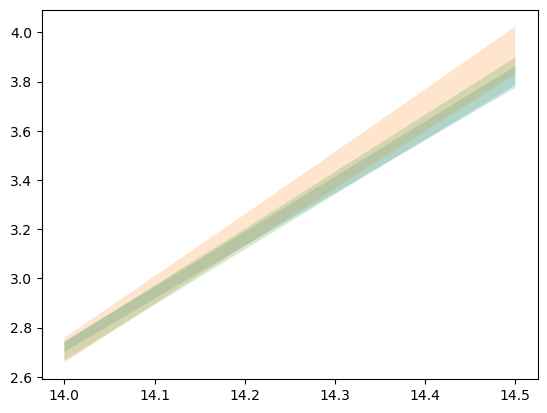

In [146]:
logm_array = np.linspace(14, 14.5, 30)
z=0.5
z0=.5
log10m0 = np.log10(10**14.3)
chains1, chains1_std = _plot_rel.mean_scaling_relation(logm_array, z, WLxN_full_range.samples, log10m0 = log10m0, z0 = z0)
chains2, chains2_std = _plot_rel.mean_scaling_relation(logm_array, z, WLxN_full_redshift_range.samples, log10m0 = log10m0, z0 = z0)
chains3, chains3_std = _plot_rel.mean_scaling_relation(logm_array, z, WLxN_full_richness_range.samples, log10m0 = log10m0, z0 = z0)
plt.fill_between(logm_array, chains1 - chains1_std, chains1 + chains1_std, alpha=.2)
plt.fill_between(logm_array, chains3 - chains3_std, chains3 + chains3_std, alpha=.2)
plt.fill_between(logm_array, chains2 - chains2_std, chains2 + chains2_std, alpha=.2)
#plt.errorbar(logm_array, chains2, chains2_std)
#plt.errorbar(logm_array, chains3, chains3_std)

In [ ]:
g.settings.axes_fontsize

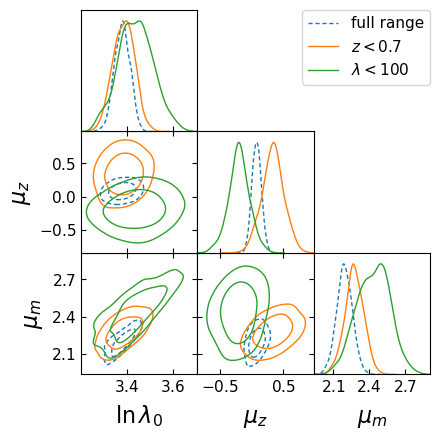

In [ ]:
g = plots.get_subplot_plotter(subplot_size=1.5)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15
range_ = {'1':[2.5,4], '2':[-2,2], '3':[1,4], '4':[0.1,1.2],'5':[-1.5,1.5], '6':[-0.5,0.5], }
g.triangle_plot([WLxN_full_range, WLxN_full_redshift_range, WLxN_full_richness_range], 
                filled=[False, False, False, False,False,], 
                contour_colors = ['C0', 'C1', 'C2', 'k', 'k', 'k' ], 
                contour_ls=['--','-','-', '-', '-'],
                contour_lws=[1,1,1,1,1],shaded=False,
                legend_fontsize = 10,
                #param_limits=range_,
                params=['1','2','3'],
                fine_bins = 1,  marker_args = {'linewidth':10}, )